**What is Feature Selection?**
 
        Feature selection is the process of choosing the most important features (variables) from a dataset to improve a machine learning model's performance and efficiency. Instead of using all the features, we select only the most relevant ones that contribute significantly to predictions.


**Why Do We Need Feature Selection?**
 
*1.Reduces Overfitting 📉*
 
        Too many irrelevant features can make a model complex and cause it to overfit the training data.

*2.Improves Model Performance 🚀*
 
        Selecting relevant features boosts accuracy and reduces unnecessary noise in the data.

*3.Reduces Training Time ⏳*
 
        Fewer features mean faster model training and lower computational cost.

*4.Enhances Interpretability 🔍*
 
        Helps in understanding which features actually impact predictions.
 

**Types of Feature Selection Methods**

<ins>*Type => Filter Methods:*</ins>
 
Method => Correlation, Chi-Square, Mutual Information.
 
Description => Rank features based on statistical tests.

<ins>*Type => Embedded Methods*</ins>
 
Method =>Lasso Regression, Decision Trees
 
Description =>Feature selection is built into the model training process.

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.linear_model import Lasso
import seaborn as sns
import matplotlib.pyplot as plt


In [55]:
#Step-1:
np.random.seed(42)
data=pd.DataFrame({
    'Size':np.random.randint(1000,5000,100),  #square feet
    'Bedrooms':np.random.randint(1,5,100),    #Number of bedrooms
    'Age':np.random.randint(1,50,100),        #Age of the house
    'Price':np.random.randint(100000,500000,100)   #House price
})

In [57]:
data.head()

,Size,Bedrooms,Age,Price
0,4174,2,32,486393
1,4507,2,39,134754
2,1860,4,49,326814
3,2294,2,32,337714
4,2130,2,4,242483


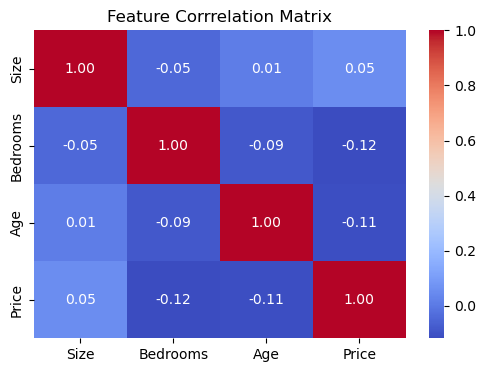

In [59]:
#Step-2:Compute correlation
plt.figure(figsize=(6,4))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm',fmt='.2f')
plt.title("Feature Corrrelation Matrix")
plt.show()

In [61]:
#Step-3:Apply recursive feature elimination (Wrapper method)
X=data.drop(columns=['Price'])
Y=data['Price']
model=RandomForestRegressor()
rfe=RFE(model,n_features_to_select=2)
X_selected=rfe.fit_transform(X,Y)
print("Selected Features using RFE:",X.columns[rfe.support_])

Selected Features using RFE: Index(['Size', 'Age'], dtype='object')


In [63]:
# Step-4:Apply Lasso(Least Absoloute Shrinkage and Selection Operator) Regression (Embedded Method)
lasso=Lasso(alpha=0.1)
lasso.fit(X,Y)
importance=np.abs(lasso.coef_)
selected_features=X.columns[importance>0]
print("Selected Features using Lasso:",selected_features)


Selected Features using Lasso: Index(['Size', 'Bedrooms', 'Age'], dtype='object')


**What is Feature Engineering?**
 
            Feature engineering is the process of creating new features or modifying existing ones to improve the performance of machine learning models. It involves techniques like feature extraction, transformation, encoding, and scaling to make data more useful for predictions.

**Why Do We Need Feature Engineering?**

1.**Improves Model Performance** – Good features help models make better predictions.
 
2.**Reduces Overfitting** – Helps eliminate noise and irrelevant data.
 
3.**Handles Missing Data** – Creates meaningful replacements for missing values.
 
4.**Enables Better Interpretability** – Makes features more understandable and useful.
5.**Reduces Dimensionality** – Helps remove unnecessary data points, making the model efficient.
has context menu

In [77]:
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
#sample dataset
df=pd.DataFrame({'TransactionDate':pd.to_datetime(['2025-02-05 14:30:00','2025-02-06 18:45:00'])})
# Extract date-relted features
df['DayOfWeek']=df['TransactionDate'].dt.dayofweek 
df['Hour']=df['TransactionDate'].dt.hour
df['IsWeekend']=df['DayOfWeek'].apply(lambda x: 1 if x>=5 else 0)
print(df)

      TransactionDate  DayOfWeek  Hour  IsWeekend
0 2025-02-05 14:30:00          2    14          0
1 2025-02-06 18:45:00          3    18          0


In [82]:
#Aggregated features
#Find average transaction amount per user:
df_transactions=pd.DataFrame({
    'UserID':[101,102,101,103,102],
    'TransactionAmount':[500,300,700,1000,400]
})
df_user_avg=df_transactions.groupby('UserID')['TransactionAmount'].mean().reset_index()
df_user_avg.rename(columns={'TransactionAmount':'AvgTransactionAmount'},inplace=True)
print(df_user_avg)

   UserID  AvgTransactionAmount
0     101                 600.0
1     102                 350.0
2     103                1000.0


In [112]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
df=pd.DataFrame({'ProductCategory':['Electronics','Clothing','Clothing','Grocery']})
encoder=OneHotEncoder(sparse_output=False)
encoded_features=encoder.fit_transform(df[['ProductCategory']])
df_encoded=pd.DataFrame(encoded_features,columns=encoder.get_feature_names_out())
print(df_encoded)
                                

   ProductCategory_Clothing  ProductCategory_Electronics  \
0                       0.0                          1.0   
1                       1.0                          0.0   
2                       1.0                          0.0   
3                       0.0                          0.0   

   ProductCategory_Grocery  
0                      0.0  
1                      0.0  
2                      0.0  
3                      1.0  


In [118]:
import numpy as np
df=pd.DataFrame({'TransactionAmount':[100,200,5000,10000,20000]})
df['LogTransactionAmount']=np.log1p(df['TransactionAmount'])

print(df)

   TransactionAmount  LogTransactionAmount
0                100              4.615121
1                200              5.303305
2               5000              8.517393
3              10000              9.210440
4              20000              9.903538


In [122]:
#Feature Scaling
# Feature scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler
 
scaler = MinMaxScaler()
df['NormalizedTransactionAmount']=scaler.fit_transform(df[['TransactionAmount']])
 
standard_scaler = StandardScaler()
df['StandardizedTransactionAmount']=standard_scaler.fit_transform(df[['TransactionAmount']])
 
print(df)
 
# Ensures all features have the same scale, preventing bias in ML models


   TransactionAmount  LogTransactionAmount  NormalizedTransactionAmount  \
0                100              4.615121                     0.000000   
1                200              5.303305                     0.005025   
2               5000              8.517393                     0.246231   
3              10000              9.210440                     0.497487   
4              20000              9.903538                     1.000000   

   StandardizedTransactionAmount  
0                      -0.937070  
1                      -0.923606  
2                      -0.277351  
3                       0.395831  
4                       1.742196  


**Final Summary of Feature Engineering & Imbalanced Data Handling**
 
Feature Extraction : Extract new insights from raw data (e.g., Hour, DayOfWeek)
 
Aggregated Features : Calculate meaningful statistics (e.g., AvgTransactionAmountPerUser)
 
Encoding : Convert categorical variables into numerical (One-Hot Encoding)
 
Log Transformation : Reduce skewness in data distribution
 
Feature Scaling : Normalize numerical features for better model performance
 
Downsampling: Reduce the size of the majority class
 
Upsampling : Increase the size of the minority class
 
SMOTE(Synthetic Minority Over-sampling Technique) : Generate synthetic samples for the minority class